In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:75% ! important; }<style>"))

/var/folders/m5/t9zr6cks3_5_11h7rhn_zb_h0000gn/T/ipykernel_44759/333272003.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:
years = list(range(2000,2023))

In [3]:
print(years)

[2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]


In [4]:
url_start = "https://www.basketball-reference.com/leagues/NBA_{}_ratings.html"

In [5]:
import requests

for year in years:
    url = url_start.format(year)
    data = requests.get(url)
    
    with open("nba_stats_standing/{}.html".format(year),"w+") as f:
        f.write(data.text)

In [6]:
from bs4 import BeautifulSoup

In [7]:
import pandas as pd
pd.set_option("display.max_columns", 100)

In [8]:
dfs = []
for year in years:
    with open("nba_stats_standing/{}.html".format(year)) as f:
        page = f.read()
    soup = BeautifulSoup(page,"html.parser")
    soup.find('tr', class_="over_header").decompose()
    ratings_table = soup.find(id="ratings")
    ratings = pd.read_html(str(ratings_table))[0]
    ratings["Year"] = year
    
    dfs.append(ratings)

In [9]:
nba_ratings = pd.concat(dfs)

In [10]:
nba_ratings.head()

,Rk,Team,Conf,Div,W,L,W/L%,MOV,ORtg,DRtg,NRtg,MOV/A,ORtg/A,DRtg/A,NRtg/A,Year
0,1,Los Angeles Lakers,W,P,67,15,0.817,8.55,107.85,98.79,9.05,8.41,107.66,98.75,8.92,2000
1,2,Portland Trail Blazers,W,P,59,23,0.720,6.40,108.75,101.67,7.08,6.37,108.71,101.68,7.03,2000
2,3,San Antonio Spurs,W,M,53,29,0.646,5.94,105.83,99.45,6.38,5.93,105.67,99.30,6.37,2000
3,4,Phoenix Suns,W,P,53,29,0.646,5.22,105.04,99.66,5.38,5.24,104.90,99.48,5.41,2000
4,5,Utah Jazz,W,M,55,27,0.671,4.46,107.97,103.09,4.88,4.52,108.00,103.06,4.94,2000


In [11]:
nba_ratings.to_csv("nba_ratings.csv")

In [12]:
url_start_2 = "https://www.basketball-reference.com/playoffs/"

In [13]:
import requests

data = requests.get(url_start_2)
with open("nba_champions/list.html","w+") as f :
    f.write(data.text)


In [14]:
dfs = []

with open("nba_champions/list.html") as f :
    page = f.read()
    soup = BeautifulSoup(page,"html.parser")
    soup.find('tr', class_="over_header").decompose()
    champs_table = soup.find(id="div_champions_index")
    champs = pd.read_html(str(champs_table))[0]
    
    dfs.append(champs)

nba_champs = pd.concat(dfs)
nba_champs.to_csv("nba_champs.csv")

In [15]:
df = pd.read_csv('nba_ratings.csv')
df.set_index('Year', inplace = True)

In [16]:
df_champs = pd.read_csv('nba_champs.csv')
df_champs.drop(labels=["Unnamed: 0","Unnamed: 5"], axis=1, inplace = True)

In [17]:
df_champs.set_index("Year", inplace = True)

In [18]:
df_champs = df_champs.loc[2022:2000]

In [19]:
df_champs.dropna(how='all')

,Lg,Champion,Runner-Up,Finals MVP,Points,Rebounds,Assists,Win Shares
Year,,,,,,,,
2022.0,NBA,NaN,NaN,NaN,J. Tatum (498),G. Antetokounmpo (170),J. Tatum (119),J. Butler (3.8)
2021.0,NBA,Milwaukee Bucks,Phoenix Suns,G. Antetokounmpo,G. Antetokounmpo (634),G. Antetokounmpo (269),J. Holiday (199),G. Antetokounmpo (3.7)
2020.0,NBA,Los Angeles Lakers,Miami Heat,L. James,A. Davis (582),L. James (226),L. James (184),A. Davis (4.5)
2019.0,NBA,Toronto Raptors,Golden State Warriors,K. Leonard,K. Leonard (732),D. Green (223),D. Green (187),K. Leonard (4.9)
2018.0,NBA,Golden State Warriors,Cleveland Cavaliers,K. Durant,L. James (748),D. Green (222),L. James (198),L. James (5.2)
2017.0,NBA,Golden State Warriors,Cleveland Cavaliers,K. Durant,L. James (591),K. Love (191),L. James (141),L. James (4.3)
2016.0,NBA,Cleveland Cavaliers,Golden State Warriors,L. James,K. Thompson (582),D. Green (228),R. Westbrook (198),L. James (4.7)
2015.0,NBA,Golden State Warriors,Cleveland Cavaliers,A. Iguodala,L. James (601),D. Howard (238),L. James (169),S. Curry (3.9)
2014.0,NBA,San Antonio Spurs,Miami Heat,K. Leonard,K. Durant (563),T. Duncan (211),R. Westbrook (153),L. James (4.3)


In [20]:
df.drop(labels="Div", axis=1, inplace = True)
df_champs.drop(labels="Lg", axis=1, inplace = True)

In [21]:
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


In [22]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [23]:
df_champs = df_champs[df_champs.index.notnull()]

In [24]:
df_champs["Year"] = df_champs.index.astype('int64')
df_champs.set_index("Year", inplace = True)


In [25]:
df.sort_index(ascending=False)
df.drop(labels="Unnamed: 0", axis=1 , inplace = True)

In [26]:
df_champs.sort_index(inplace = True)

In [28]:
df["Final"] = ""
final_list = []
n = 0
c = 0
            
while df.index[n] == df_champs.index[c] :
    for x in df.loc[df.index[n] ,"Team"] :
        if ((x == df_champs.loc[df_champs.index[c], "Champion"]) == True) | ((x == df_champs.loc[df_champs.index[c], "Runner-Up"]) == True):
            final_list.append("True")
                     
        else : 
            final_list.append("False")

  
    if df.index[n] < 2005: 
        n += 29
    elif df.index[n] >= 2005:
        n += 30
    
    c += 1
    if c == 23:
        break


df["Final"] = final_list

In [29]:
df["Champion"] = ""
champ_list = []
n = 0
c = 0

while df.index[n] == df_champs.index[c] :
    for x in df.loc[df.index[n] ,"Team"] :
        if ((x == df_champs.loc[df_champs.index[c], "Champion"]) == True):
            champ_list.append("True")
        else:
            champ_list.append("False")
            
    if df.index[n] < 2005: 
        n += 29
    elif df.index[n] >= 2005:
        n += 30
    
    c += 1
    if c == 23:
        break

df["Champion"] = champ_list

<AxesSubplot:xlabel='Year', ylabel='NRtg'>

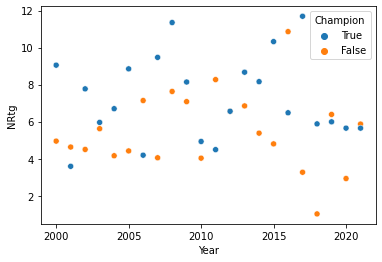

In [30]:
df_onlyfinal = df.loc[(df["Final"] == "True") ] #only get teams who go to finals
df_onlyfinal.sort_values(by =['Year','W'], ascending=False) # only 4/17 Teams that went to the finals and won when their W/L% < = 0.683 total is more than  Thus i will remove as those teams that won are outlier
# df_onlyfinal.groupby(['Rk'])['Champion'].count()
sns.scatterplot(x=df_onlyfinal.index, y=df_onlyfinal['NRtg'], hue=df_onlyfinal['Champion'])

<AxesSubplot:xlabel='W', ylabel='NRtg'>

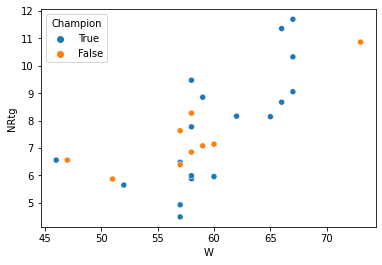

In [31]:
df_onlytop5 = df_onlyfinal.loc[(df_onlyfinal["W/L%"] > 0.683) ]
df_onlytop5.groupby(['Champion']).count()
sns.scatterplot(x=df_onlytop5['W'], y=df_onlytop5['NRtg'], hue=df_onlytop5['Champion']) # A Team with a NRtg > 8 and W > 55 majority won the championship

In [32]:
print(len(df_onlytop5.loc[df_onlytop5["Champion"]== "True"])/len(df_onlytop5)*100)

66.66666666666666


In [33]:
df_finalfilt = df_onlytop5.loc[(df_onlytop5["W"] > 55) & (df_onlytop5["NRtg"] > 8) ]
print(len(df_finalfilt.loc[df_finalfilt["Champion"]== "True"])/len(df_finalfilt)*100)
# A Team With A W/L% of more than 0.683 and More than 55 wins and a Net Rating of more than 8 when entering to the finals have a 81% chance of wining the championship

81.81818181818183


In [34]:
df_finalfilt

,Rk,Team,Conf,W,L,W/L%,MOV,ORtg,DRtg,NRtg,MOV/A,ORtg/A,DRtg/A,NRtg/A,Final,Champion
Year,,,,,,,,,,,,,,,,
2000,1,Los Angeles Lakers,W,67,15,0.817,8.55,107.85,98.79,9.05,8.41,107.66,98.75,8.92,True,True
2005,1,San Antonio Spurs,W,59,23,0.720,7.80,108.45,99.59,8.85,7.84,108.18,99.31,8.87,True,True
2007,1,San Antonio Spurs,W,58,24,0.707,8.43,110.11,100.64,9.47,8.35,109.84,100.47,9.37,True,True
2008,1,Boston Celtics,E,66,16,0.805,10.26,111.10,99.75,11.35,9.31,110.55,100.23,10.32,True,True
2009,3,Los Angeles Lakers,W,65,17,0.793,7.66,113.43,105.29,8.14,7.11,113.00,105.45,7.55,True,True
2011,1,Miami Heat,E,58,24,0.707,7.46,112.62,104.35,8.27,6.76,112.43,104.94,7.49,True,False
2013,2,Miami Heat,E,66,16,0.805,7.87,113.43,104.77,8.67,7.03,113.28,105.53,7.75,True,True
2014,1,San Antonio Spurs,W,62,20,0.756,7.72,111.09,102.93,8.16,7.99,110.98,102.53,8.45,True,True
2015,1,Golden State Warriors,W,67,15,0.817,10.10,112.18,101.86,10.32,10.01,111.90,101.67,10.23,True,True
